In [1]:
!pip install sidetable

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [2]:
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

BASE_DIR = '../input/playground-series-s3e7/'
XGBoost_CV_n_split = 10

In [3]:
df_train = pd.read_csv(BASE_DIR + 'train.csv')
df_test = pd.read_csv(BASE_DIR + 'test.csv')
df_sample = pd.read_csv(BASE_DIR + 'sample_submission.csv')
df_orig = pd.read_csv('../input/reservation-cancellation-prediction/train__dataset.csv')

In [4]:
df_orig.info(),df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

(None, None)

In [5]:
df_orig

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18132,1,0,0,2,0,0,0,103,2018,4,19,0,0,0,0,115.00,0,1
18133,2,0,0,3,0,0,0,129,2018,8,10,1,0,0,0,88.01,1,0
18134,2,0,0,1,0,0,0,90,2018,7,13,1,0,0,0,105.30,0,1
18135,2,0,0,3,0,0,0,18,2018,11,10,1,1,0,1,123.33,1,0


In [6]:
df_train.stb.freq(['booking_status'],style=True)

,booking_status,count,percent,cumulative_count,cumulative_percent
0,0,"25,596",60.80%,"25,596",60.80%
1,1,"16,504",39.20%,"42,100",100.00%


# 2. no_of_adults

In [7]:
df_train.stb.freq(['no_of_adults'],style=True)

,no_of_adults,count,percent,cumulative_count,cumulative_percent
0,2,"30,771",73.09%,"30,771",73.09%
1,1,"7,089",16.84%,"37,860",89.93%
2,3,"4,061",9.65%,"41,921",99.57%
3,0,167,0.40%,"42,088",99.97%
4,4,12,0.03%,"42,100",100.00%


In [8]:
df_train.stb.freq(['no_of_adults'],style=True)

,no_of_adults,count,percent,cumulative_count,cumulative_percent
0,2,"30,771",73.09%,"30,771",73.09%
1,1,"7,089",16.84%,"37,860",89.93%
2,3,"4,061",9.65%,"41,921",99.57%
3,0,167,0.40%,"42,088",99.97%
4,4,12,0.03%,"42,100",100.00%


In [9]:
df_train.groupby(['booking_status','no_of_adults'])['id'].count()

booking_status  no_of_adults
0               0                 107
                1                5089
                2               17993
                3                2401
                4                   6
1               0                  60
                1                2000
                2               12778
                3                1660
                4                   6
Name: id, dtype: int64

In [10]:
pd.crosstab(df_train['booking_status'], df_train['no_of_adults'])

no_of_adults,0,1,2,3,4
booking_status,,,,,
0,107,5089,17993,2401,6
1,60,2000,12778,1660,6


# 3. no_of_children

In [11]:
df_train.stb.freq(['no_of_children'],style=True)

,no_of_children,count,percent,cumulative_count,cumulative_percent
0,0,"37,786",89.75%,"37,786",89.75%
1,1,"2,729",6.48%,"40,515",96.24%
2,2,"1,561",3.71%,"42,076",99.94%
3,3,17,0.04%,"42,093",99.98%
4,4,5,0.01%,"42,098",100.00%
5,9,2,0.00%,"42,100",100.00%


<AxesSubplot:xlabel='no_of_children', ylabel='no_of_adults'>

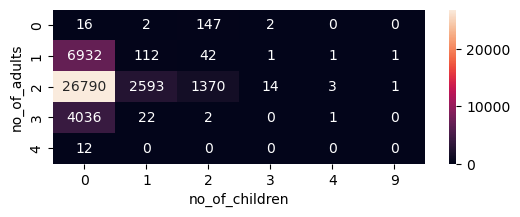

In [12]:
# why no_of_adults == 0 and no_of_children == 0 have values 
# Who are these peoples ALIENS!
plt.figure(figsize=(6, 2))
sns.heatmap(pd.crosstab(df_train['no_of_adults'], df_train['no_of_children']), 
            annot=True, fmt='')

# 4. no_of_weekend_nights

In [13]:
df_train.stb.freq(['no_of_weekend_nights'],style=True)

,no_of_weekend_nights,count,percent,cumulative_count,cumulative_percent
0,0,"18,137",43.08%,"18,137",43.08%
1,2,"12,143",28.84%,"30,280",71.92%
2,1,"11,389",27.05%,"41,669",98.98%
3,3,239,0.57%,"41,908",99.54%
4,4,128,0.30%,"42,036",99.85%
5,5,46,0.11%,"42,082",99.96%
6,6,17,0.04%,"42,099",100.00%
7,7,1,0.00%,"42,100",100.00%


<AxesSubplot:xlabel='no_of_weekend_nights', ylabel='no_of_adults'>

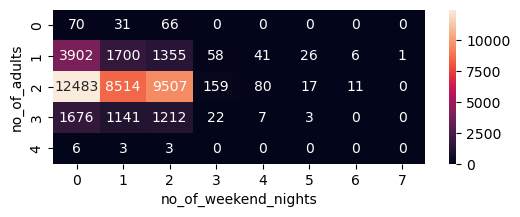

In [14]:
plt.figure(figsize=(6, 2))
sns.heatmap(pd.crosstab(df_train['no_of_adults'], df_train['no_of_weekend_nights']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='no_of_weekend_nights', ylabel='no_of_children'>

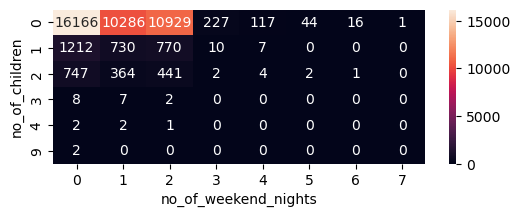

In [15]:
plt.figure(figsize=(6, 2))
sns.heatmap(pd.crosstab(df_train['no_of_children'], df_train['no_of_weekend_nights']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='no_of_weekend_nights', ylabel='booking_status'>

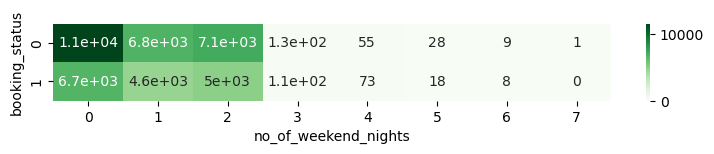

In [16]:
plt.figure(figsize=(9, 1))
sns.heatmap(pd.crosstab(df_train['booking_status'], df_train['no_of_weekend_nights']), 
            annot=True, cmap="Greens")

<AxesSubplot:ylabel='booking_status'>

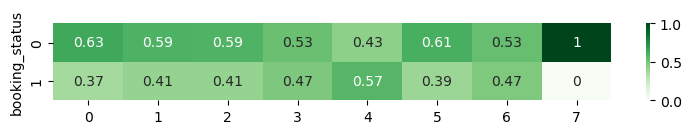

In [17]:
plt.figure(figsize=(9, 1))
sns.heatmap(pd.crosstab(df_train['booking_status'], df_train['no_of_weekend_nights'])/df_train['no_of_weekend_nights'].value_counts(), 
            annot=True, cmap="Greens")

# 5. no_of_week_nights

In [18]:
df_train.stb.freq(['no_of_week_nights'],style=True)

,no_of_week_nights,count,percent,cumulative_count,cumulative_percent
0,2,"12,905",30.65%,"12,905",30.65%
1,3,"10,286",24.43%,"23,191",55.09%
2,1,"9,558",22.70%,"32,749",77.79%
3,4,"4,175",9.92%,"36,924",87.71%
4,5,"2,573",6.11%,"39,497",93.82%
5,0,"1,937",4.60%,"41,434",98.42%
6,6,237,0.56%,"41,671",98.98%
7,7,160,0.38%,"41,831",99.36%
8,8,84,0.20%,"41,915",99.56%
9,10,82,0.19%,"41,997",99.76%


<AxesSubplot:xlabel='no_of_week_nights', ylabel='no_of_adults'>

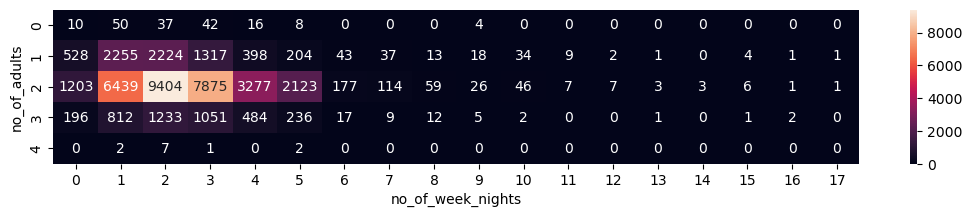

In [19]:
plt.figure(figsize=(13, 2))
sns.heatmap(pd.crosstab(df_train['no_of_adults'], df_train['no_of_week_nights']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='no_of_week_nights', ylabel='no_of_children'>

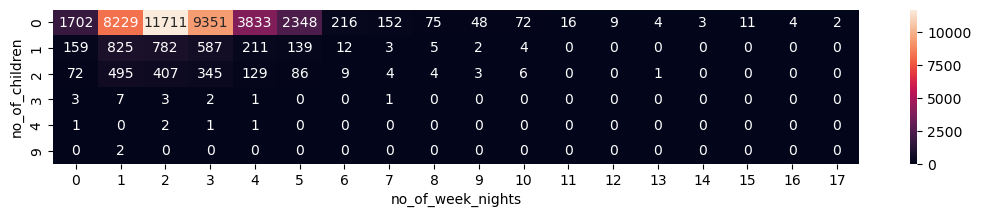

In [20]:
plt.figure(figsize=(13, 2))
sns.heatmap(pd.crosstab(df_train['no_of_children'], df_train['no_of_week_nights']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='no_of_week_nights', ylabel='no_of_weekend_nights'>

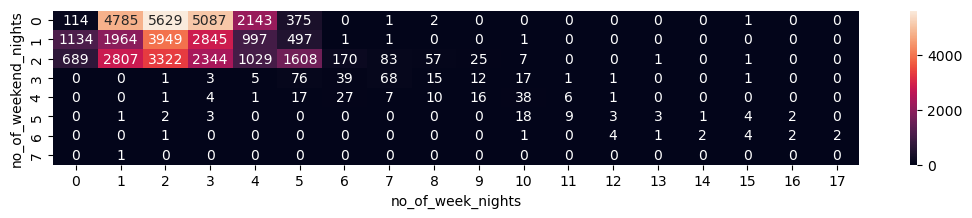

In [21]:
plt.figure(figsize=(13, 2))
sns.heatmap(pd.crosstab(df_train['no_of_weekend_nights'], df_train['no_of_week_nights']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='no_of_week_nights', ylabel='booking_status'>

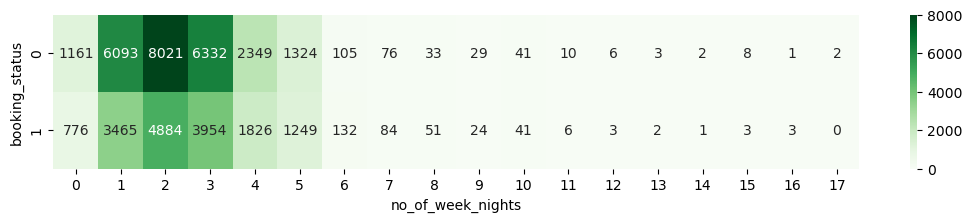

In [22]:
plt.figure(figsize=(13, 2))
sns.heatmap(pd.crosstab(df_train['booking_status'], df_train['no_of_week_nights']), 
            annot=True, fmt='', cmap="Greens")

# 6. types_of_meal_plan

In [23]:
df_train.stb.freq(['type_of_meal_plan'], style=True)

,type_of_meal_plan,count,percent,cumulative_count,cumulative_percent
0,0,"35,463",84.24%,"35,463",84.24%
1,2,"3,421",8.13%,"38,884",92.36%
2,1,"3,210",7.62%,"42,094",99.99%
3,3,6,0.01%,"42,100",100.00%


<AxesSubplot:xlabel='type_of_meal_plan', ylabel='no_of_weekend_nights'>

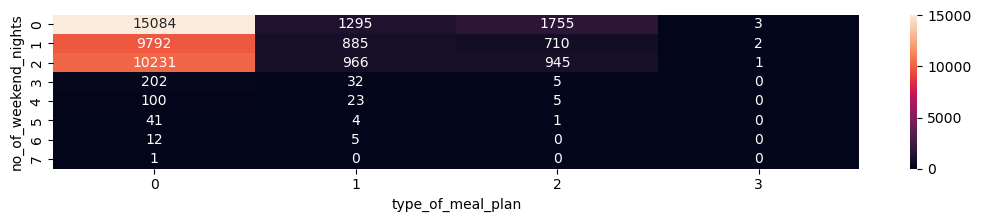

In [24]:
plt.figure(figsize=(13, 2))
sns.heatmap(pd.crosstab(df_train['no_of_weekend_nights'], df_train['type_of_meal_plan']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='no_of_week_nights', ylabel='type_of_meal_plan'>

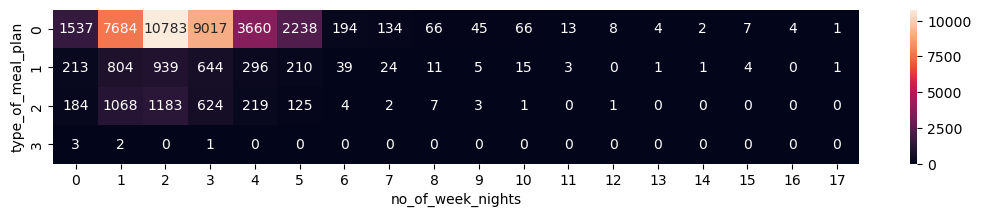

In [25]:
plt.figure(figsize=(13, 2))
sns.heatmap(pd.crosstab(df_train['type_of_meal_plan'], df_train['no_of_week_nights']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='no_of_children', ylabel='type_of_meal_plan'>

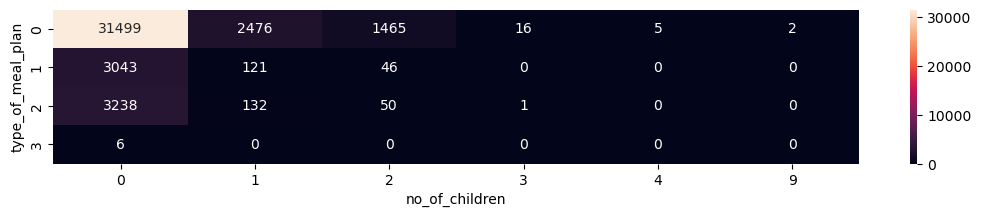

In [26]:
plt.figure(figsize=(13, 2))
sns.heatmap(pd.crosstab(df_train['type_of_meal_plan'], df_train['no_of_children']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='no_of_adults', ylabel='type_of_meal_plan'>

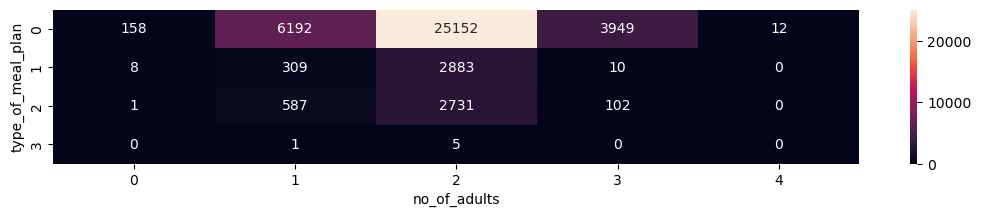

In [27]:
plt.figure(figsize=(13, 2))
sns.heatmap(pd.crosstab(df_train['type_of_meal_plan'], df_train['no_of_adults']), 
            annot=True, fmt='')

# 7. required_car_parking_space

In [28]:
df_train.stb.freq(['required_car_parking_space'], style=True)

,required_car_parking_space,count,percent,cumulative_count,cumulative_percent
0,0,"41,037",97.48%,"41,037",97.48%
1,1,"1,063",2.52%,"42,100",100.00%


<AxesSubplot:xlabel='required_car_parking_space', ylabel='booking_status'>

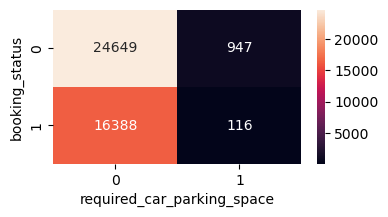

In [29]:
plt.figure(figsize=(4, 2))
sns.heatmap(pd.crosstab(df_train['booking_status'], df_train['required_car_parking_space']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='required_car_parking_space', ylabel='no_of_weekend_nights'>

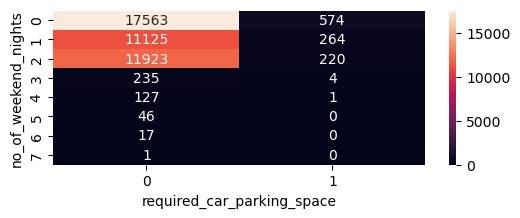

In [30]:
plt.figure(figsize=(6, 2))
sns.heatmap(pd.crosstab(df_train['no_of_weekend_nights'], df_train['required_car_parking_space']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='required_car_parking_space', ylabel='no_of_week_nights'>

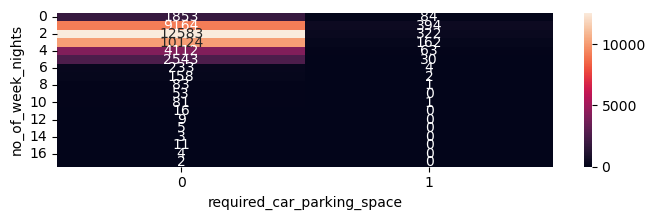

In [31]:
plt.figure(figsize=(8, 2))
sns.heatmap(pd.crosstab(df_train['no_of_week_nights'], df_train['required_car_parking_space']), 
            annot=True, fmt='')

# 8. room_type_reserved

In [32]:
df_train.stb.freq(['room_type_reserved'], style=True)

,room_type_reserved,count,percent,cumulative_count,cumulative_percent
0,0,"29,853",70.91%,"29,853",70.91%
1,1,"9,135",21.70%,"38,988",92.61%
2,3,"1,465",3.48%,"40,453",96.09%
3,2,"1,131",2.69%,"41,584",98.77%
4,4,320,0.76%,"41,904",99.53%
5,5,190,0.45%,"42,094",99.99%
6,6,6,0.01%,"42,100",100.00%


<AxesSubplot:xlabel='room_type_reserved', ylabel='booking_status'>

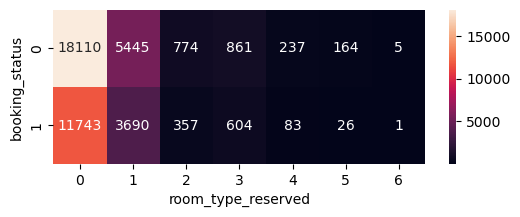

In [33]:
plt.figure(figsize=(6, 2))
sns.heatmap(pd.crosstab(df_train['booking_status'], df_train['room_type_reserved']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='room_type_reserved', ylabel='required_car_parking_space'>

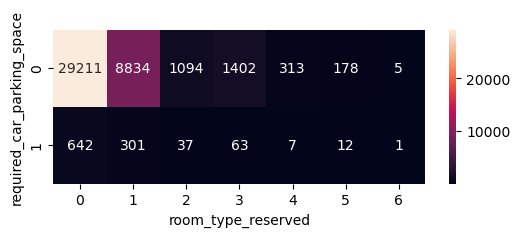

In [34]:
plt.figure(figsize=(6, 2))
sns.heatmap(pd.crosstab(df_train['required_car_parking_space'], df_train['room_type_reserved']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='room_type_reserved', ylabel='type_of_meal_plan'>

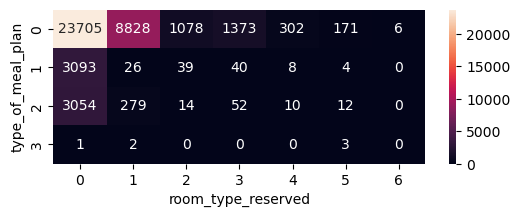

In [35]:
plt.figure(figsize=(6, 2))
sns.heatmap(pd.crosstab(df_train['type_of_meal_plan'], df_train['room_type_reserved']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='room_type_reserved', ylabel='no_of_week_nights'>

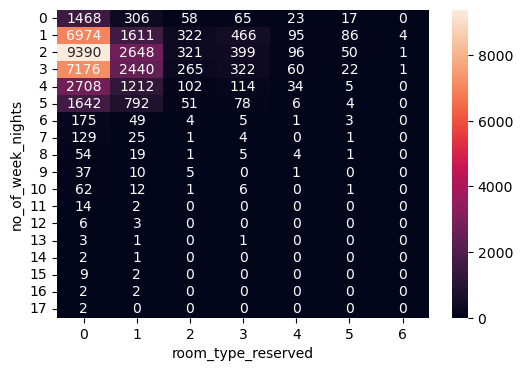

In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(df_train['no_of_week_nights'], df_train['room_type_reserved']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='room_type_reserved', ylabel='no_of_weekend_nights'>

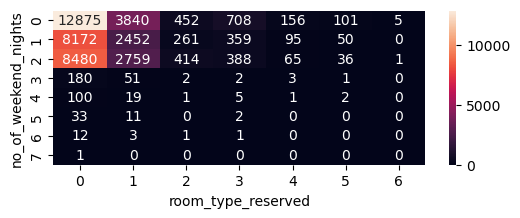

In [37]:
plt.figure(figsize=(6, 2))
sns.heatmap(pd.crosstab(df_train['no_of_weekend_nights'], df_train['room_type_reserved']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='room_type_reserved', ylabel='no_of_children'>

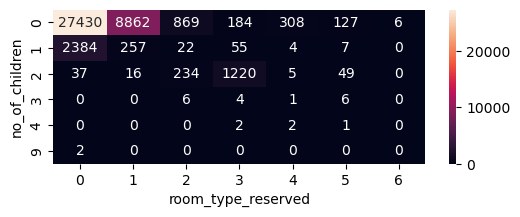

In [38]:
plt.figure(figsize=(6, 2))
sns.heatmap(pd.crosstab(df_train['no_of_children'], df_train['room_type_reserved']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='room_type_reserved', ylabel='no_of_adults'>

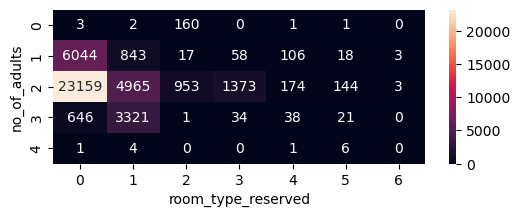

In [39]:
plt.figure(figsize=(6, 2))
sns.heatmap(pd.crosstab(df_train['no_of_adults'], df_train['room_type_reserved']), 
            annot=True, fmt='')

# 9. lead_time
- Number of days between the date of booking and the arrival date

#### INSIGHTS
- If we have more than around 150 days of gap between booking and arrival time than higher probability of getting booked

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

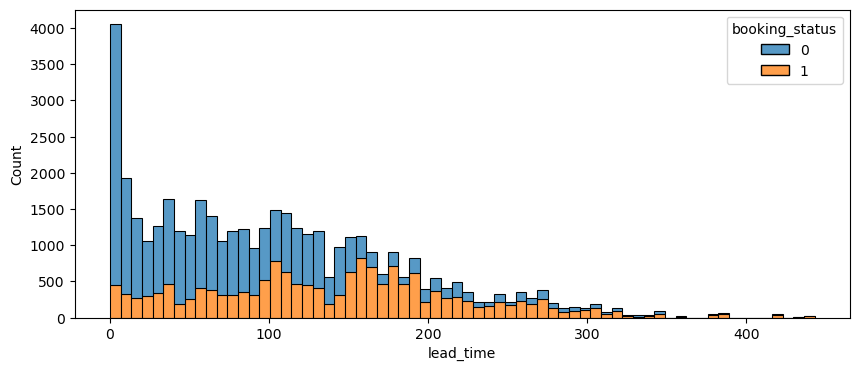

In [40]:
plt.figure(figsize=(10, 4))
sns.histplot(x=df_train['lead_time'], hue=df_train['booking_status'], multiple='stack')

<AxesSubplot:xlabel='lead_time', ylabel='no_of_adults'>

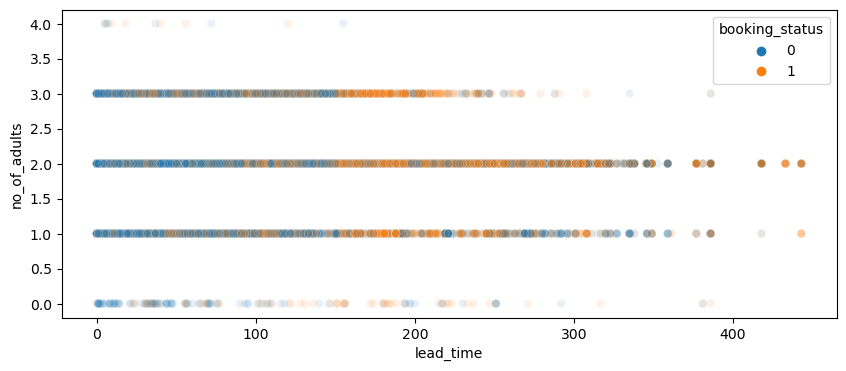

In [41]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df_train['lead_time'], y=df_train['no_of_adults'],  hue=df_train['booking_status'], alpha=0.1)

<AxesSubplot:xlabel='no_of_adults', ylabel='lead_time'>

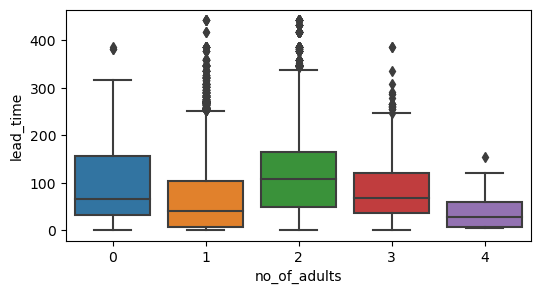

In [42]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df_train['no_of_adults'], y=df_train['lead_time'])

<AxesSubplot:xlabel='no_of_children', ylabel='lead_time'>

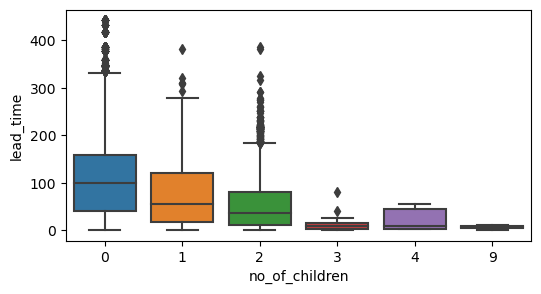

In [43]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df_train['no_of_children'], y=df_train['lead_time'])

<AxesSubplot:xlabel='no_of_weekend_nights', ylabel='lead_time'>

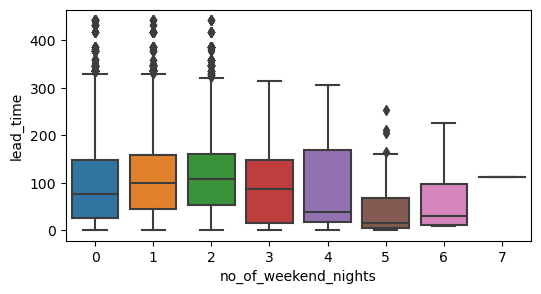

In [44]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df_train['no_of_weekend_nights'], y=df_train['lead_time'])

<AxesSubplot:xlabel='no_of_week_nights', ylabel='lead_time'>

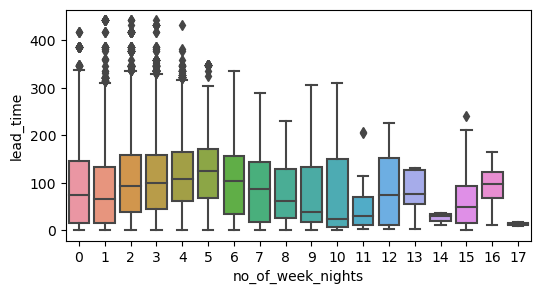

In [45]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df_train['no_of_week_nights'], y=df_train['lead_time'])

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='lead_time'>

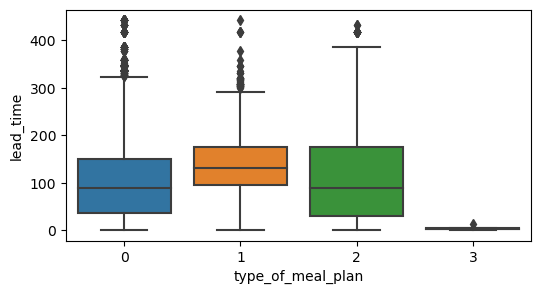

In [46]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df_train['type_of_meal_plan'], y=df_train['lead_time'])

<AxesSubplot:xlabel='required_car_parking_space', ylabel='lead_time'>

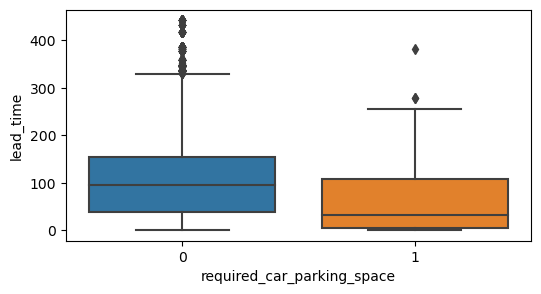

In [47]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df_train['required_car_parking_space'], y=df_train['lead_time'])

<AxesSubplot:xlabel='room_type_reserved', ylabel='lead_time'>

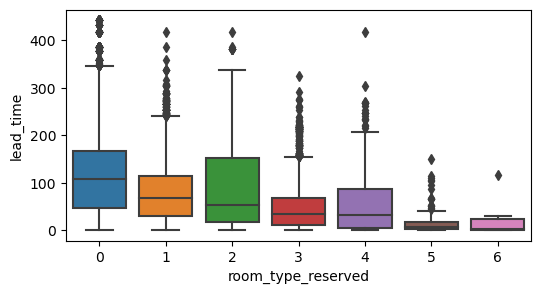

In [48]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df_train['room_type_reserved'], y=df_train['lead_time'])

# 10. arrival_year

In [49]:
df_train.stb.freq(['arrival_year'], style=True)

,arrival_year,count,percent,cumulative_count,cumulative_percent
0,2018,"36,050",85.63%,"36,050",85.63%
1,2017,"6,050",14.37%,"42,100",100.00%


<AxesSubplot:xlabel='arrival_year', ylabel='booking_status'>

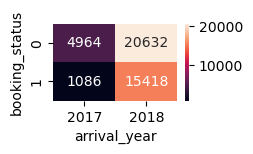

In [50]:
plt.figure(figsize=(2, 1))
sns.heatmap(pd.crosstab(df_train['booking_status'], df_train['arrival_year']), 
            annot=True, fmt='')

<AxesSubplot:xlabel='arrival_year', ylabel='lead_time'>

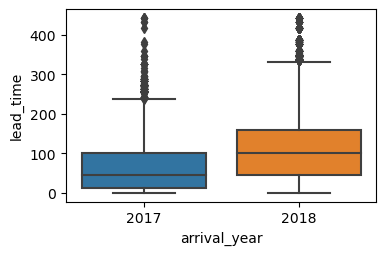

In [51]:
plt.figure(figsize=(4, 2.5))
sns.boxplot(x=df_train['arrival_year'], y=df_train['lead_time'])

# 11. arrival_month

#### INSIGHTS
- Feels like most people cancel the reservation near NEW YEAR
- (room_type_reserved) on average 90% of the people book room_type 0 and 1 while 
    - 65 to 75% of the people book type 0
- 

In [52]:
df_train.stb.freq(['arrival_month'], style=True)

,arrival_month,count,percent,cumulative_count,cumulative_percent
0,10,"6,453",15.33%,"6,453",15.33%
1,8,"5,763",13.69%,"12,216",29.02%
2,9,"5,148",12.23%,"17,364",41.24%
3,7,"4,681",11.12%,"22,045",52.36%
4,12,"3,391",8.05%,"25,436",60.42%
5,6,"3,356",7.97%,"28,792",68.39%
6,5,"3,292",7.82%,"32,084",76.21%
7,4,"3,006",7.14%,"35,090",83.35%
8,11,"2,803",6.66%,"37,893",90.01%
9,3,"2,201",5.23%,"40,094",95.24%


<AxesSubplot:xlabel='arrival_month', ylabel='booking_status'>

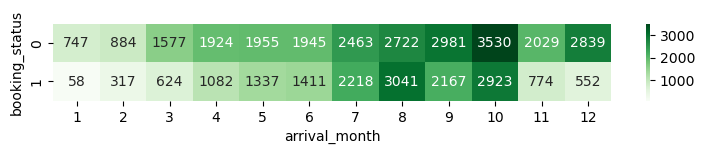

In [53]:
plt.figure(figsize=(9, 1))
sns.heatmap(pd.crosstab(df_train['booking_status'], df_train['arrival_month']), 
            annot=True, fmt='', cmap='Greens')

<AxesSubplot:xlabel='arrival_month', ylabel='no_of_adults'>

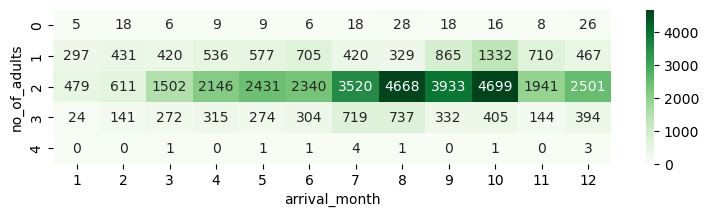

In [54]:
plt.figure(figsize=(9, 2))
sns.heatmap(pd.crosstab(df_train['no_of_adults'], df_train['arrival_month']), 
            annot=True, fmt='', cmap='Greens')

In [55]:
df_train.query('no_of_children != 0')['no_of_children']

5        2
11       2
12       1
22       2
38       1
        ..
42033    1
42049    1
42053    1
42075    1
42076    2
Name: no_of_children, Length: 4314, dtype: int64

<AxesSubplot:xlabel='arrival_month', ylabel='no_of_children'>

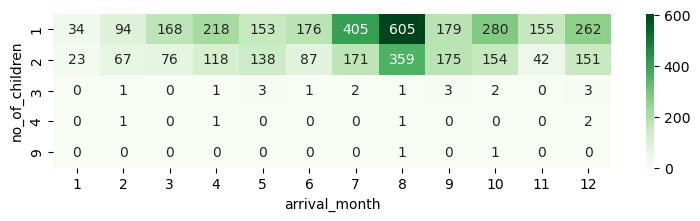

In [56]:
# no_of_children == 0 was blocking our intuition
plt.figure(figsize=(9, 2))
sns.heatmap(pd.crosstab(df_train.query('no_of_children != 0')['no_of_children'], 
                        df_train['arrival_month']), annot=True, fmt='', cmap='Greens')

<AxesSubplot:xlabel='arrival_month', ylabel='no_of_week_nights'>

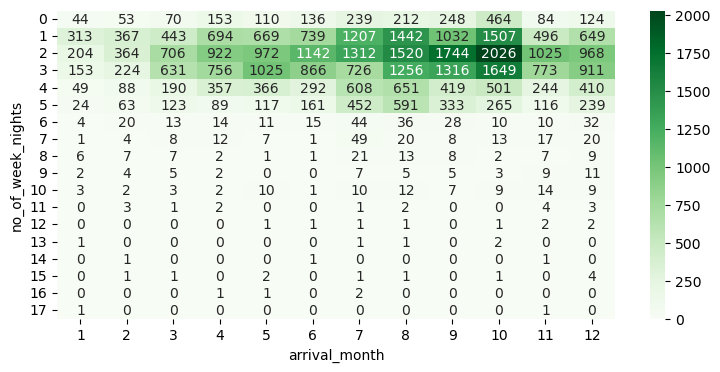

In [57]:
plt.figure(figsize=(9, 4))
sns.heatmap(pd.crosstab(df_train['no_of_week_nights'], df_train['arrival_month']), 
            annot=True, fmt='', cmap='Greens')

<AxesSubplot:xlabel='arrival_month', ylabel='type_of_meal_plan'>

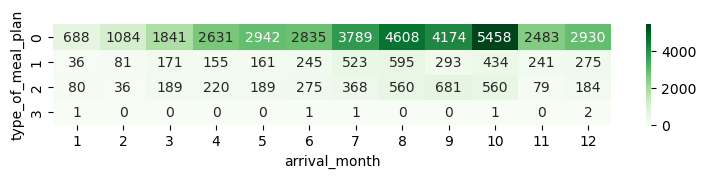

In [58]:
plt.figure(figsize=(9, 1.3))
sns.heatmap(pd.crosstab(df_train['type_of_meal_plan'], df_train['arrival_month']), 
            annot=True, fmt='', cmap='Greens')

In [59]:
 df_train['arrival_month']

0         1
1         7
2        12
3        12
4        10
         ..
42095    12
42096     9
42097     7
42098    11
42099    10
Name: arrival_month, Length: 42100, dtype: int64

In [60]:
7/805

0.008695652173913044

In [61]:
 df_train['arrival_month'].value_counts()

10    6453
8     5763
9     5148
7     4681
12    3391
6     3356
5     3292
4     3006
11    2803
3     2201
2     1201
1      805
Name: arrival_month, dtype: int64

In [62]:
 df_train['arrival_month']*100/df_train['arrival_month'].value_counts()

0             NaN
1        0.869565
2        0.999167
3        0.545207
4        0.332668
           ...   
42095         NaN
42096         NaN
42097         NaN
42098         NaN
42099         NaN
Name: arrival_month, Length: 42100, dtype: float64

<AxesSubplot:xlabel='arrival_month', ylabel='room_type_reserved'>

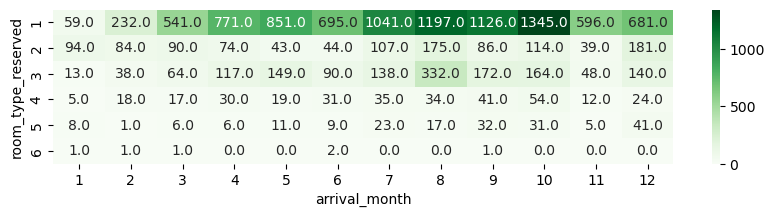

In [63]:
plt.figure(figsize=(10, 2))
sns.heatmap(pd.crosstab(df_train.query('room_type_reserved != 0')['room_type_reserved'], 
                        df_train['arrival_month']), 
            annot=True, fmt='.1f', cmap='Greens')

<AxesSubplot:ylabel='room_type_reserved'>

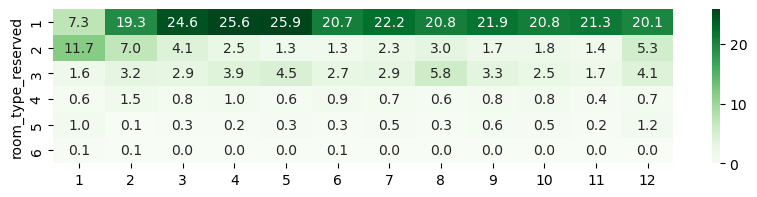

In [64]:
# every month percentage
plt.figure(figsize=(10, 2))
sns.heatmap(pd.crosstab(df_train.query('room_type_reserved != 0')['room_type_reserved'], 
                        df_train['arrival_month'])*100/df_train['arrival_month'].value_counts(), 
            annot=True, fmt='.1f', cmap='Greens')

<AxesSubplot:xlabel='arrival_month', ylabel='lead_time'>

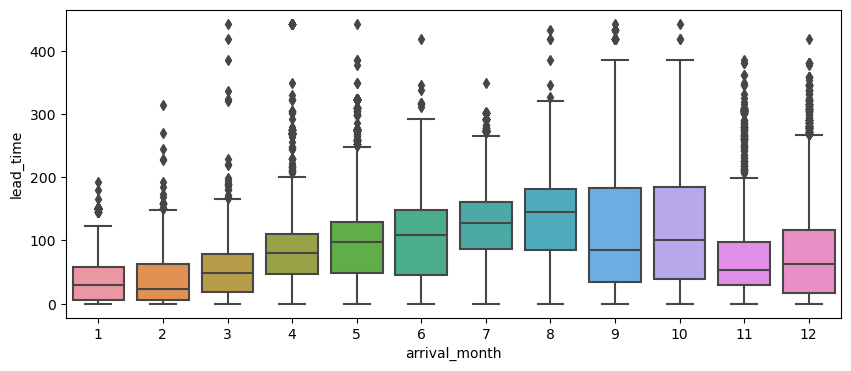

In [65]:
plt.figure(figsize=(10, 4))
sns.boxplot(y=df_train['lead_time'], x=df_train['arrival_month'],)

<AxesSubplot:ylabel='arrival_year'>

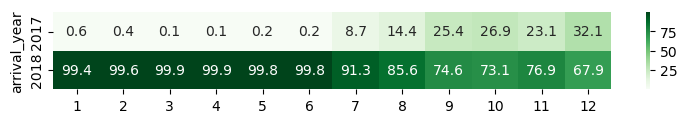

In [66]:
# Percentage
plt.figure(figsize=(9, 1))
sns.heatmap(pd.crosstab(df_train['arrival_year'], df_train['arrival_month'])
            *100/df_train['arrival_month'].value_counts(), 
            annot=True, fmt='.1f',cmap='Greens')

# 12. arrival_date

#### INSIGHT
- I don't think so it will be worth spending time analysing 'arrival_date' feature because freq distribution will change after every month.

In [67]:
df_train.stb.freq(['arrival_date'], style=True)

,arrival_date,count,percent,cumulative_count,cumulative_percent
0,27,"1,633",3.88%,"1,633",3.88%
1,16,"1,600",3.80%,"3,233",7.68%
2,30,"1,538",3.65%,"4,771",11.33%
3,13,"1,479",3.51%,"6,250",14.85%
4,26,"1,460",3.47%,"7,710",18.31%
5,25,"1,447",3.44%,"9,157",21.75%
6,4,"1,438",3.42%,"10,595",25.17%
7,20,"1,437",3.41%,"12,032",28.58%
8,1,"1,428",3.39%,"13,460",31.97%
9,17,"1,426",3.39%,"14,886",35.36%


<AxesSubplot:ylabel='booking_status'>

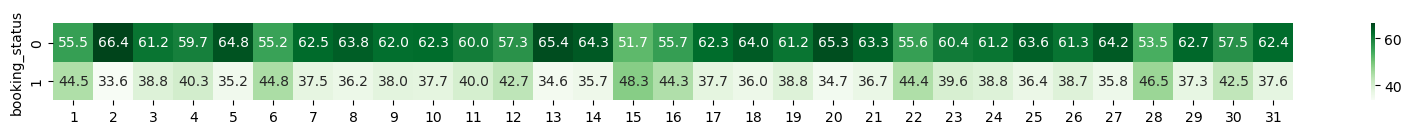

In [68]:
# Percentage
plt.figure(figsize=(20, 1))
sns.heatmap(pd.crosstab(df_train['booking_status'], df_train['arrival_date'])
            *100/df_train['arrival_date'].value_counts(), 
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:ylabel='no_of_adults'>

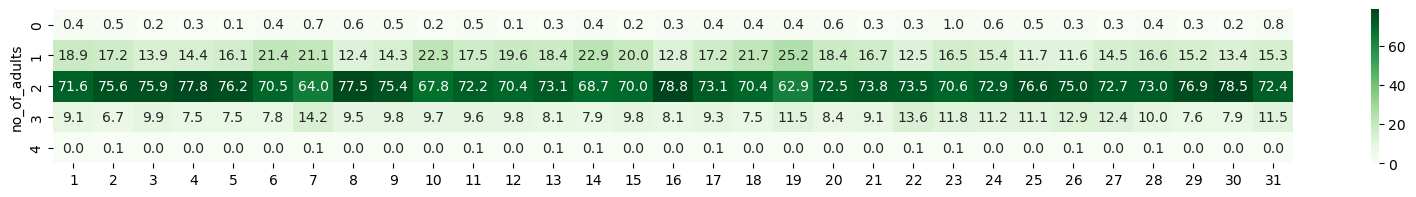

In [69]:
# Percentage
plt.figure(figsize=(20, 2))
sns.heatmap(pd.crosstab(df_train['no_of_adults'], df_train['arrival_date'])
            *100/df_train['arrival_date'].value_counts(), 
            annot=True, fmt='0.1f', cmap='Greens')

# 13. market_segment_type

In [70]:
df_train.stb.freq(['market_segment_type'], style=True)

,market_segment_type,count,percent,cumulative_count,cumulative_percent
0,1,"25,885",61.48%,"25,885",61.48%
1,0,"14,306",33.98%,"40,191",95.47%
2,2,"1,384",3.29%,"41,575",98.75%
3,4,442,1.05%,"42,017",99.80%
4,3,83,0.20%,"42,100",100.00%


<AxesSubplot:ylabel='booking_status'>

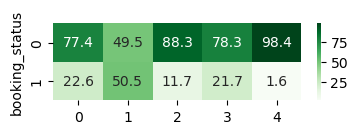

In [71]:
# Percentage
plt.figure(figsize=(4, 1))
sns.heatmap(pd.crosstab(df_train['booking_status'], df_train['market_segment_type'])
            *100/df_train['market_segment_type'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:ylabel='no_of_adults'>

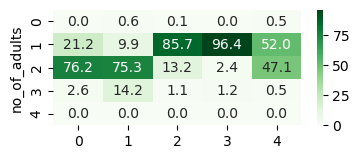

In [72]:
# Percentage
plt.figure(figsize=(4, 1.5))
sns.heatmap(pd.crosstab(df_train['no_of_adults'], df_train['market_segment_type'])
            *100/df_train['market_segment_type'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:ylabel='no_of_weekend_nights'>

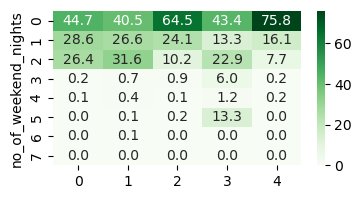

In [73]:
# Percentage
plt.figure(figsize=(4, 2))
sns.heatmap(pd.crosstab(df_train['no_of_weekend_nights'], df_train['market_segment_type'])
            *100/df_train['market_segment_type'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:ylabel='type_of_meal_plan'>

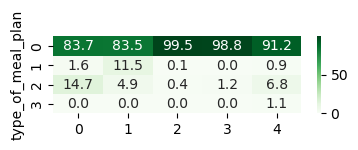

In [74]:
# Percentage
plt.figure(figsize=(4, 1))
sns.heatmap(pd.crosstab(df_train['type_of_meal_plan'], df_train['market_segment_type'])
            *100/df_train['market_segment_type'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:ylabel='room_type_reserved'>

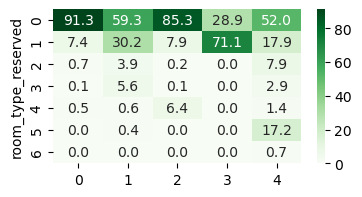

In [75]:
# Percentage
plt.figure(figsize=(4, 2))
sns.heatmap(pd.crosstab(df_train['room_type_reserved'], df_train['market_segment_type'])
            *100/df_train['market_segment_type'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:xlabel='market_segment_type', ylabel='lead_time'>

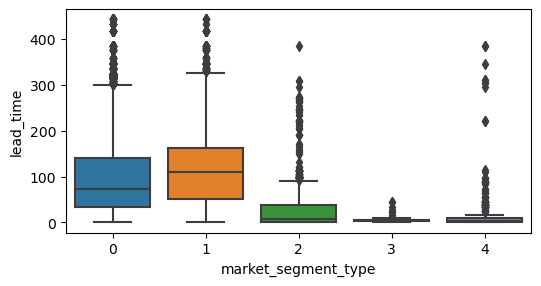

In [76]:
plt.figure(figsize=(6, 2.9))
sns.boxplot(x=df_train['market_segment_type'] , y=df_train['lead_time'])

<AxesSubplot:ylabel='arrival_year'>

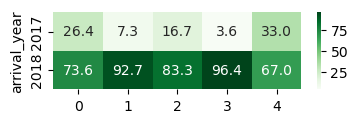

In [77]:
# Percentage
plt.figure(figsize=(4, 1))
sns.heatmap(pd.crosstab(df_train['arrival_year'], df_train['market_segment_type'])
            *100/df_train['market_segment_type'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:ylabel='arrival_month'>

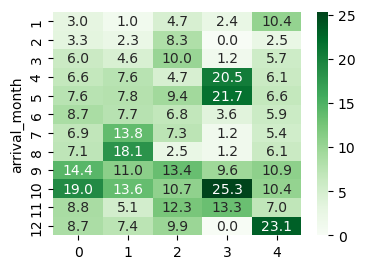

In [78]:
# Percentage
plt.figure(figsize=(4, 2.9))
sns.heatmap(pd.crosstab(df_train['arrival_month'], df_train['market_segment_type'])
            *100/df_train['market_segment_type'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:ylabel='arrival_date'>

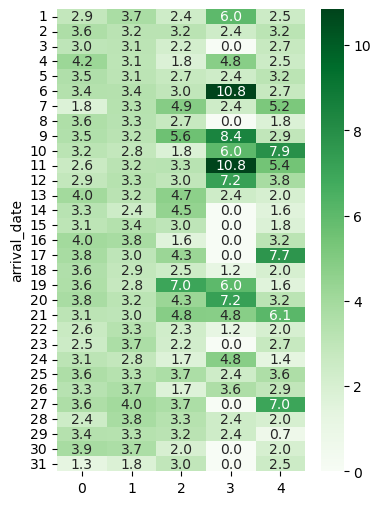

In [79]:
# Percentage
plt.figure(figsize=(4, 6))
sns.heatmap(pd.crosstab(df_train['arrival_date'], df_train['market_segment_type'])
            *100/df_train['market_segment_type'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

# 14. repeated_guest

#### INSIGHTS
- Out of the repeated_guest = 1 there is 99.1% people cancelled the booking

In [80]:
df_train.stb.freq(['repeated_guest'], style=True)

,repeated_guest,count,percent,cumulative_count,cumulative_percent
0,0,"40,871",97.08%,"40,871",97.08%
1,1,"1,229",2.92%,"42,100",100.00%


<AxesSubplot:xlabel='repeated_guest', ylabel='booking_status'>

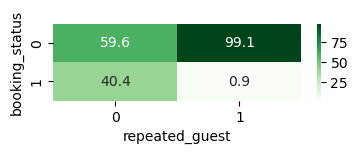

In [81]:
# Percentage
plt.figure(figsize=(4, 1))
sns.heatmap(pd.crosstab(df_train['booking_status'], df_train['repeated_guest'])
            *100/df_train['repeated_guest'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:xlabel='repeated_guest', ylabel='no_of_adults'>

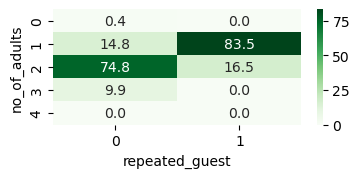

In [82]:
# Percentage
plt.figure(figsize=(4, 1.5))
sns.heatmap(pd.crosstab(df_train['no_of_adults'], df_train['repeated_guest'])
            *100/df_train['repeated_guest'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:xlabel='repeated_guest', ylabel='no_of_weekend_nights'>

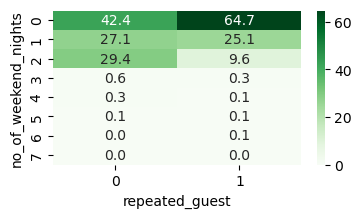

In [83]:
# Percentage
plt.figure(figsize=(4, 2))
sns.heatmap(pd.crosstab(df_train['no_of_weekend_nights'], df_train['repeated_guest'])
            *100/df_train['repeated_guest'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:xlabel='repeated_guest', ylabel='no_of_week_nights'>

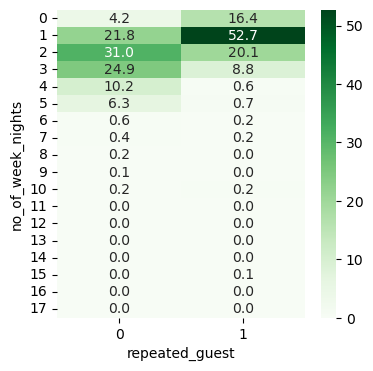

In [84]:
# Percentage
plt.figure(figsize=(4, 4))
sns.heatmap(pd.crosstab(df_train['no_of_week_nights'], df_train['repeated_guest'])
            *100/df_train['repeated_guest'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:xlabel='repeated_guest', ylabel='type_of_meal_plan'>

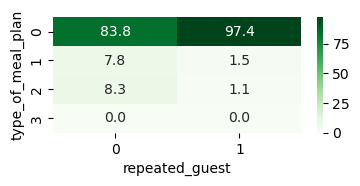

In [85]:
# Percentage
plt.figure(figsize=(4, 1.5))
sns.heatmap(pd.crosstab(df_train['type_of_meal_plan'], df_train['repeated_guest'])
            *100/df_train['repeated_guest'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:xlabel='repeated_guest', ylabel='required_car_parking_space'>

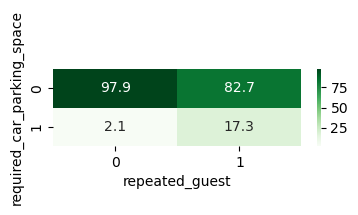

In [86]:
# Percentage
plt.figure(figsize=(4, 1))
sns.heatmap(pd.crosstab(df_train['required_car_parking_space'], df_train['repeated_guest'])
            *100/df_train['repeated_guest'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:xlabel='repeated_guest', ylabel='room_type_reserved'>

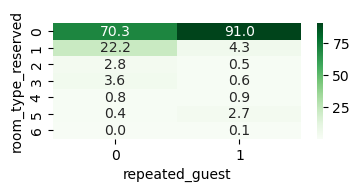

In [87]:
# Percentage
plt.figure(figsize=(4, 1.5))
sns.heatmap(pd.crosstab(df_train['room_type_reserved'], df_train['repeated_guest'])
            *100/df_train['repeated_guest'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:xlabel='repeated_guest', ylabel='lead_time'>

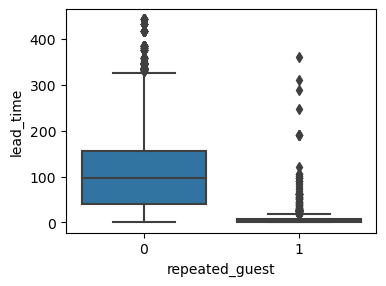

In [88]:
plt.figure(figsize=(4, 2.9))
sns.boxplot(x=df_train['repeated_guest'] , y=df_train['lead_time'])

<AxesSubplot:ylabel='repeated_guest'>

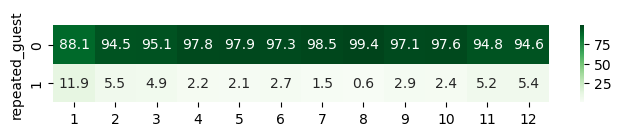

In [89]:
# Percentage
plt.figure(figsize=(8, 1))
sns.heatmap(pd.crosstab(df_train['repeated_guest'], df_train['arrival_month'])
            *100/df_train['arrival_month'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

<AxesSubplot:ylabel='repeated_guest'>

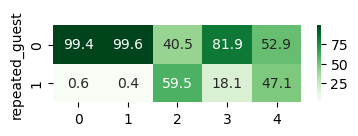

In [90]:
# Percentage
plt.figure(figsize=(4, 1))
sns.heatmap(pd.crosstab(df_train['repeated_guest'], df_train['market_segment_type'])
            *100/df_train['market_segment_type'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')

# 15. no_of_previous_cancellations
- I don't think no_of_previous_cancellations is helping us to predict our Point Of Interest because 99% of the data contain 0 previous cancellations

In [91]:
df_train.stb.freq(['no_of_previous_cancellations'], style=True)

,no_of_previous_cancellations,count,percent,cumulative_count,cumulative_percent
0,0,"41,755",99.18%,"41,755",99.18%
1,1,195,0.46%,"41,950",99.64%
2,2,53,0.13%,"42,003",99.77%
3,3,51,0.12%,"42,054",99.89%
4,11,22,0.05%,"42,076",99.94%
5,4,15,0.04%,"42,091",99.98%
6,13,3,0.01%,"42,094",99.99%
7,5,3,0.01%,"42,097",99.99%
8,6,2,0.00%,"42,099",100.00%
9,8,1,0.00%,"42,100",100.00%


<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='booking_status'>

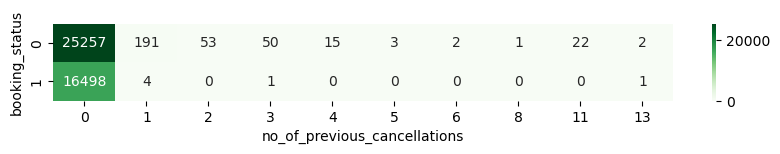

In [92]:
plt.figure(figsize=(10, 1))
sns.heatmap(pd.crosstab(df_train['booking_status'], df_train['no_of_previous_cancellations']),
            annot=True, fmt='', cmap='Greens')

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='no_of_adults'>

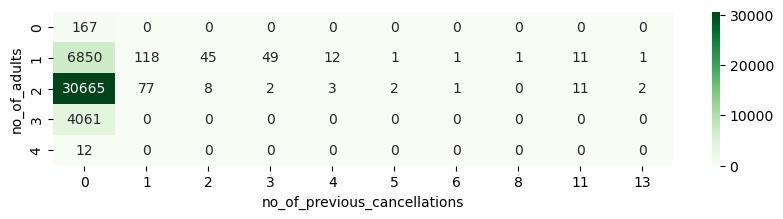

In [93]:
plt.figure(figsize=(10, 2))
sns.heatmap(pd.crosstab(df_train['no_of_adults'], df_train['no_of_previous_cancellations']),
            annot=True, fmt='', cmap='Greens')

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='no_of_adults-booking_status'>

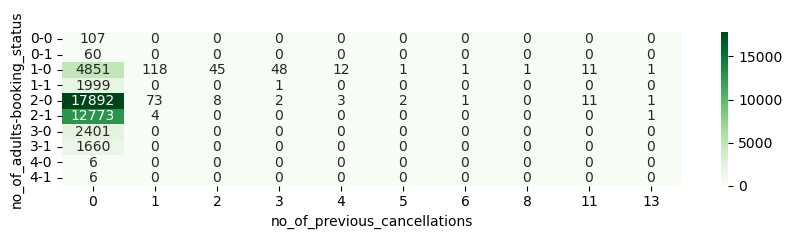

In [94]:
plt.figure(figsize=(10, 2))
sns.heatmap(pd.crosstab([df_train['no_of_adults'], df_train['booking_status']], df_train['no_of_previous_cancellations']),
            annot=True, fmt='', cmap='Greens')

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='no_of_children-booking_status'>

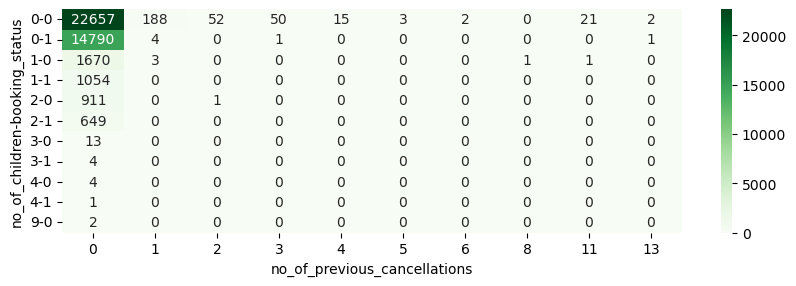

In [95]:
plt.figure(figsize=(10, 2.9))
sns.heatmap(pd.crosstab([df_train['no_of_children'], df_train['booking_status']], df_train['no_of_previous_cancellations']),
            annot=True, fmt='', cmap='Greens')

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='no_of_weekend_nights-booking_status'>

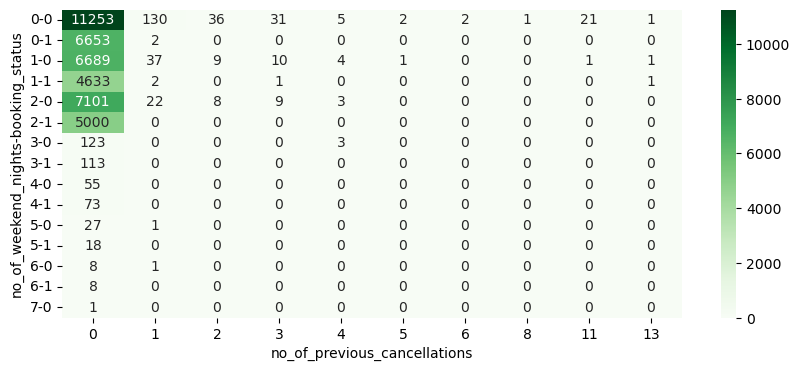

In [96]:
plt.figure(figsize=(10, 4))
sns.heatmap(pd.crosstab([df_train['no_of_weekend_nights'], df_train['booking_status']], df_train['no_of_previous_cancellations']),
            annot=True, fmt='', cmap='Greens')

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='type_of_meal_plan-booking_status'>

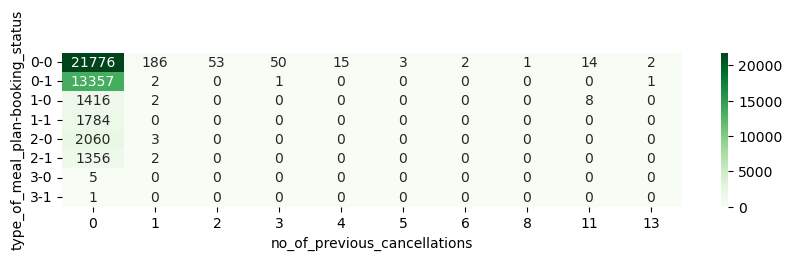

In [97]:
plt.figure(figsize=(10, 2))
sns.heatmap(pd.crosstab([df_train['type_of_meal_plan'], df_train['booking_status']], df_train['no_of_previous_cancellations']),
            annot=True, fmt='', cmap='Greens')

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='lead_time'>

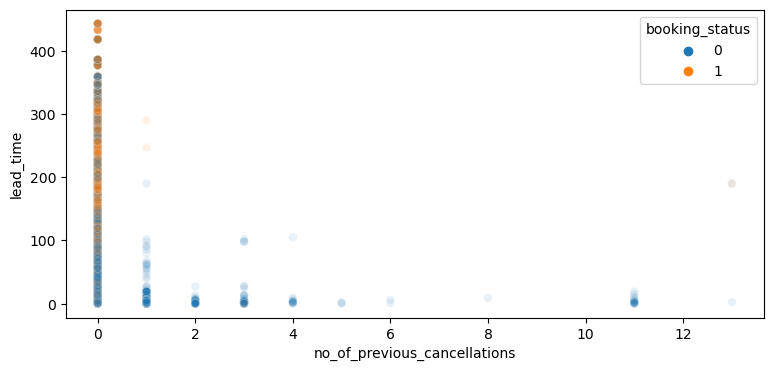

In [98]:
plt.figure(figsize=(9, 4))
sns.scatterplot(x=df_train['no_of_previous_cancellations'] , 
                y=df_train['lead_time'], 
                hue=df_train['booking_status'],
                alpha=0.1)

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='market_segment_type-booking_status'>

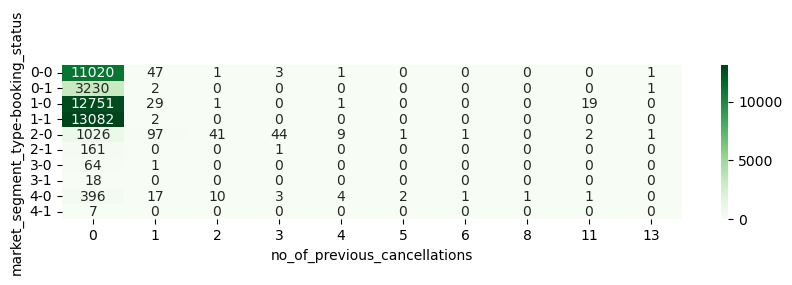

In [99]:
plt.figure(figsize=(10, 2))
sns.heatmap(pd.crosstab([df_train['market_segment_type'], df_train['booking_status']], df_train['no_of_previous_cancellations']),
            annot=True, fmt='', cmap='Greens')

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='repeated_guest-booking_status'>

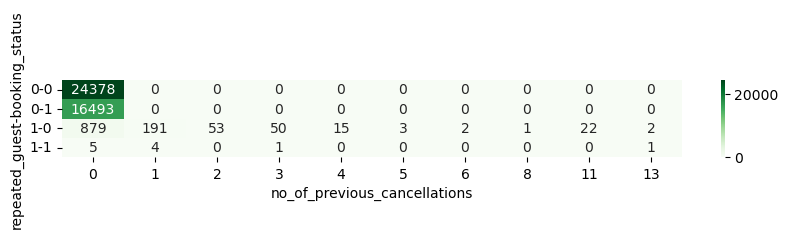

In [100]:
plt.figure(figsize=(10, 1))
sns.heatmap(pd.crosstab([df_train['repeated_guest'], df_train['booking_status']], df_train['no_of_previous_cancellations']),
            annot=True, fmt='', cmap='Greens')

# 16. no_of_previous_bookings_not_canceled

#### INSIGHTS
- I don't think so again that this is helping us in finding booking_status because 97% have value 0

In [101]:
df_train.stb.freq(['no_of_previous_bookings_not_canceled'], style=True)

,no_of_previous_bookings_not_canceled,count,percent,cumulative_count,cumulative_percent
0,0,"40,993",97.37%,"40,993",97.37%
1,1,262,0.62%,"41,255",97.99%
2,2,147,0.35%,"41,402",98.34%
3,3,112,0.27%,"41,514",98.61%
4,5,102,0.24%,"41,616",98.85%
5,4,87,0.21%,"41,703",99.06%
6,8,52,0.12%,"41,755",99.18%
7,6,49,0.12%,"41,804",99.30%
8,7,44,0.10%,"41,848",99.40%
9,11,36,0.09%,"41,884",99.49%


<AxesSubplot:xlabel='booking_status', ylabel='no_of_previous_bookings_not_canceled'>

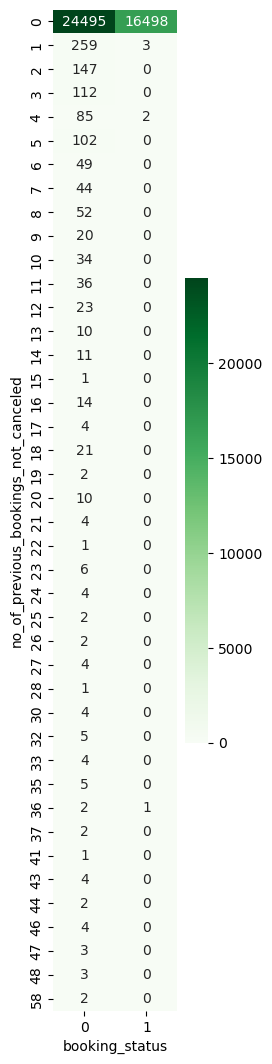

In [102]:
plt.figure(figsize=(2, 13))
sns.heatmap(pd.crosstab(df_train['no_of_previous_bookings_not_canceled'], df_train['booking_status']),
            annot=True, fmt='', cmap='Greens')

# 17. avg_price_per_room

#### INSIGHT
- As the price go up the probability of cancelling reservation go down (slightly)

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Count'>

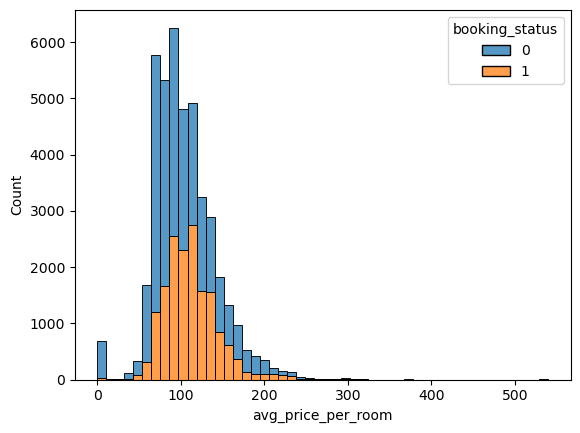

In [103]:
sns.histplot(x=df_train['avg_price_per_room'], hue=df_train['booking_status'], bins=50, multiple='stack')

<AxesSubplot:xlabel='no_of_adults', ylabel='avg_price_per_room'>

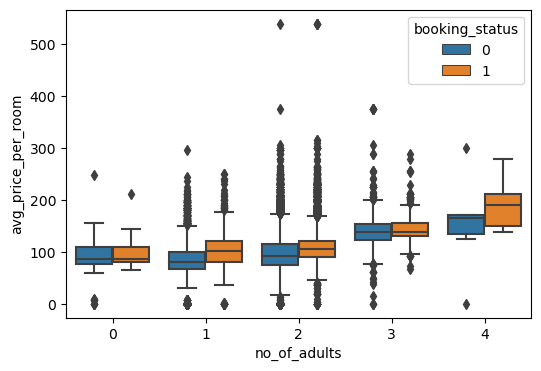

In [104]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_train['no_of_adults'] , y=df_train['avg_price_per_room'], hue=df_train['booking_status'])

<AxesSubplot:xlabel='no_of_children', ylabel='avg_price_per_room'>

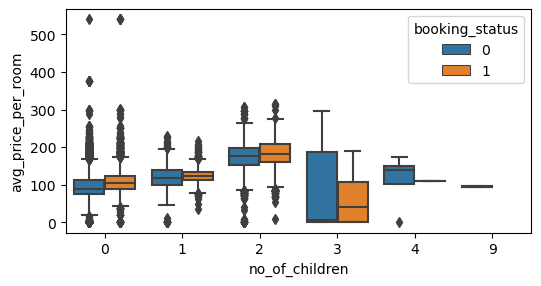

In [105]:
plt.figure(figsize=(6, 2.9))
sns.boxplot(x=df_train['no_of_children'] , y=df_train['avg_price_per_room'], hue=df_train['booking_status'])

<AxesSubplot:xlabel='no_of_weekend_nights', ylabel='avg_price_per_room'>

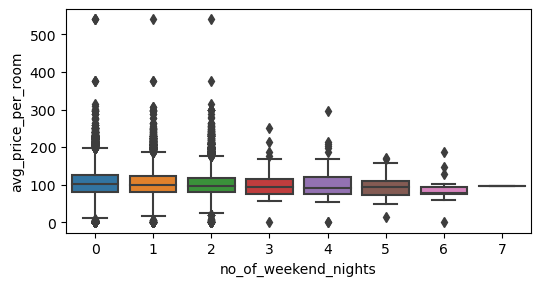

In [106]:
plt.figure(figsize=(6, 2.9))
sns.boxplot(x=df_train['no_of_weekend_nights'] , y=df_train['avg_price_per_room'])

<AxesSubplot:xlabel='no_of_week_nights', ylabel='avg_price_per_room'>

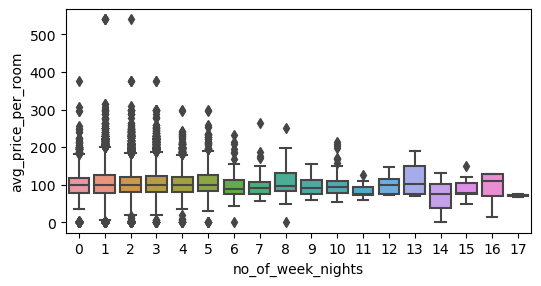

In [107]:
plt.figure(figsize=(6, 2.9))
sns.boxplot(x=df_train['no_of_week_nights'] , y=df_train['avg_price_per_room'])

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='avg_price_per_room'>

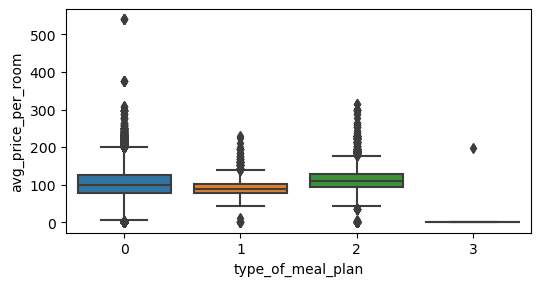

In [108]:
plt.figure(figsize=(6, 2.9))
sns.boxplot(x=df_train['type_of_meal_plan'] , y=df_train['avg_price_per_room'])

<AxesSubplot:xlabel='required_car_parking_space', ylabel='avg_price_per_room'>

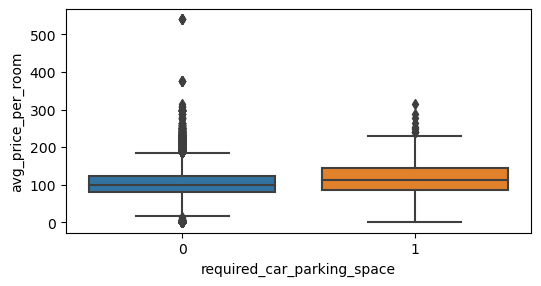

In [109]:
plt.figure(figsize=(6, 2.9))
sns.boxplot(x=df_train['required_car_parking_space'] , y=df_train['avg_price_per_room'])

<AxesSubplot:xlabel='required_car_parking_space', ylabel='avg_price_per_room'>

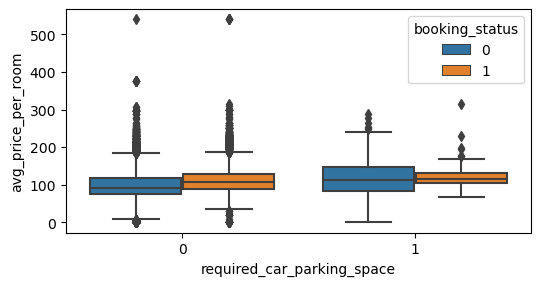

In [110]:
plt.figure(figsize=(6, 2.9))
sns.boxplot(x=df_train['required_car_parking_space'] , y=df_train['avg_price_per_room'], hue=df_train['booking_status'])

<AxesSubplot:xlabel='room_type_reserved', ylabel='avg_price_per_room'>

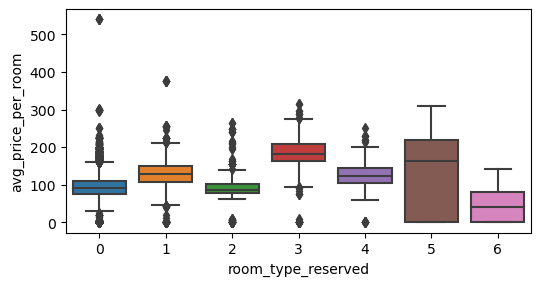

In [111]:
plt.figure(figsize=(6, 2.9))
sns.boxplot(x=df_train['room_type_reserved'] , y=df_train['avg_price_per_room'])

<AxesSubplot:xlabel='lead_time', ylabel='avg_price_per_room'>

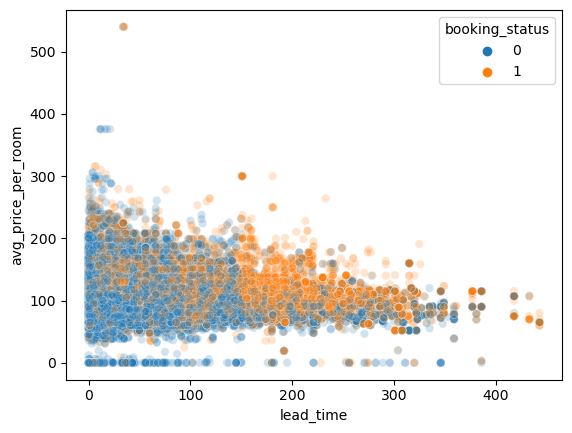

In [112]:
sns.scatterplot(x=df_train['lead_time'], y=df_train['avg_price_per_room'], 
                hue=df_train['booking_status'], alpha=0.2)

<AxesSubplot:xlabel='arrival_year', ylabel='avg_price_per_room'>

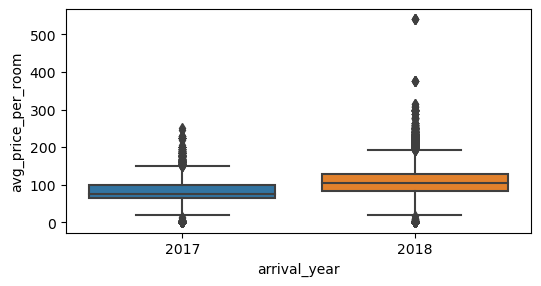

In [113]:
plt.figure(figsize=(6, 2.9))
sns.boxplot(x=df_train['arrival_year'] , y=df_train['avg_price_per_room'])

<AxesSubplot:xlabel='arrival_month', ylabel='avg_price_per_room'>

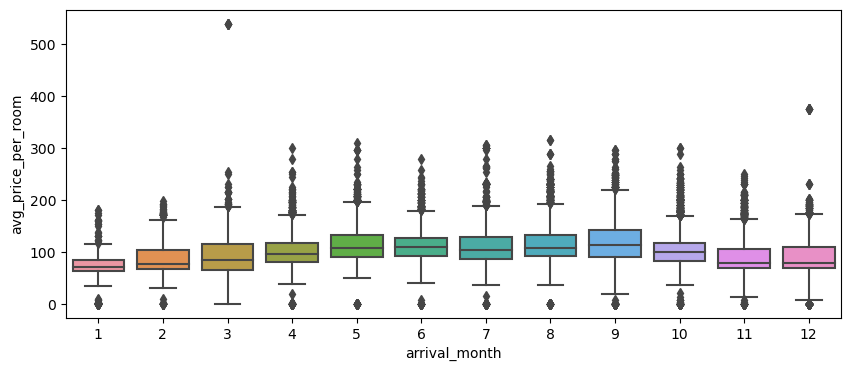

In [114]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_train['arrival_month'] , y=df_train['avg_price_per_room'])

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

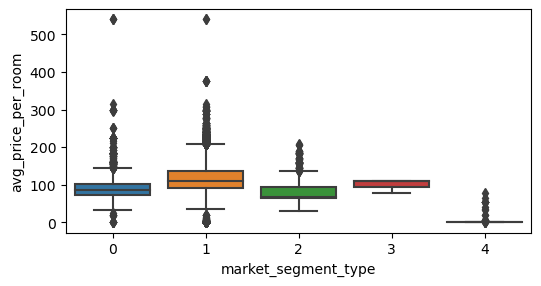

In [115]:
plt.figure(figsize=(6, 2.9))
sns.boxplot(x=df_train['market_segment_type'] , y=df_train['avg_price_per_room'])

<AxesSubplot:xlabel='repeated_guest', ylabel='avg_price_per_room'>

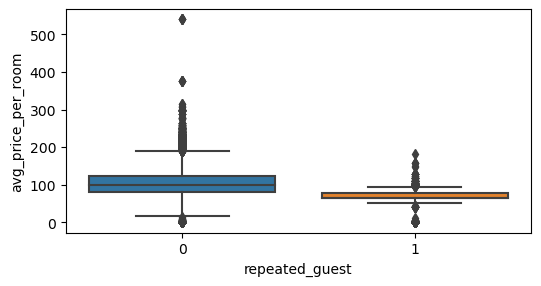

In [116]:
plt.figure(figsize=(6, 2.9))
sns.boxplot(x=df_train['repeated_guest'] , y=df_train['avg_price_per_room'])

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='avg_price_per_room'>

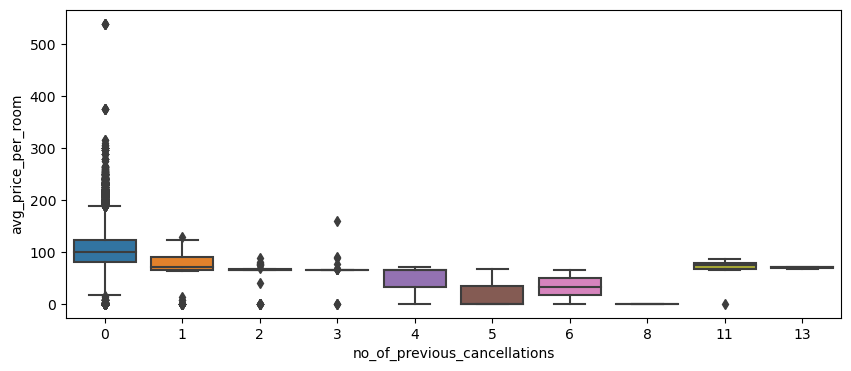

In [117]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_train['no_of_previous_cancellations'] , y=df_train['avg_price_per_room'])

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='avg_price_per_room'>

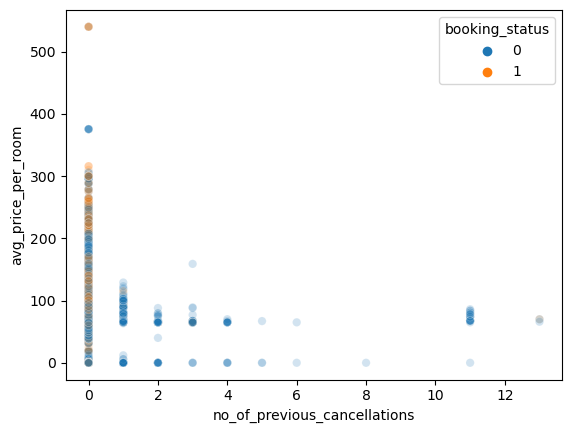

In [118]:
sns.scatterplot(x=df_train['no_of_previous_cancellations'], y=df_train['avg_price_per_room'], 
                hue=df_train['booking_status'], alpha=0.2)

<AxesSubplot:xlabel='no_of_previous_bookings_not_canceled', ylabel='avg_price_per_room'>

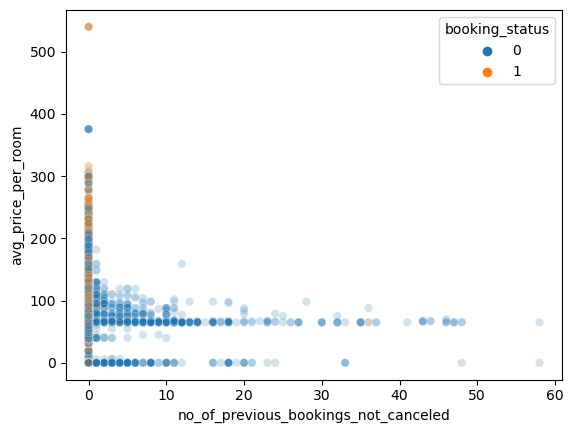

In [119]:
sns.scatterplot(x=df_train['no_of_previous_bookings_not_canceled'], y=df_train['avg_price_per_room'], 
                hue=df_train['booking_status'], alpha=0.2)

# 18. no_of_special_requests

#### INSIGHTS
- The more special_request people the more probability have that they will cancel the reservation

In [120]:
df_train.stb.freq(['no_of_special_requests'], style=True)

,no_of_special_requests,count,percent,cumulative_count,cumulative_percent
0,0,"24,554",58.32%,"24,554",58.32%
1,1,"11,885",28.23%,"36,439",86.55%
2,2,"4,900",11.64%,"41,339",98.19%
3,3,660,1.57%,"41,999",99.76%
4,4,100,0.24%,"42,099",100.00%
5,5,1,0.00%,"42,100",100.00%


<AxesSubplot:xlabel='no_of_special_requests', ylabel='booking_status'>

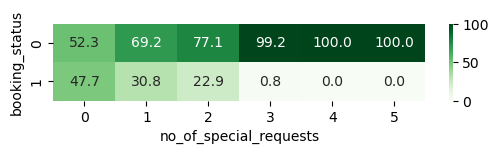

In [121]:
plt.figure(figsize=(6, 1))
sns.heatmap(pd.crosstab(df_train['booking_status'], df_train['no_of_special_requests'])
            *100/df_train['no_of_special_requests'].value_counts(),
            annot=True, fmt='0.1f', cmap='Greens')